IMPORTING DEPENDENCIES

In [70]:
#importing dependencies
import numpy as np  #create lists or arrays
import pandas as pd #create dataframes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # score to evaluate model



DATA COLLECTION AND PROCESSING

In [3]:
heart_data=pd.read_csv('/content/data.csv')

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#no. of rows and cols in dataset
heart_data.shape

(303, 14)

In [7]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#checking missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#checking distribution of target variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


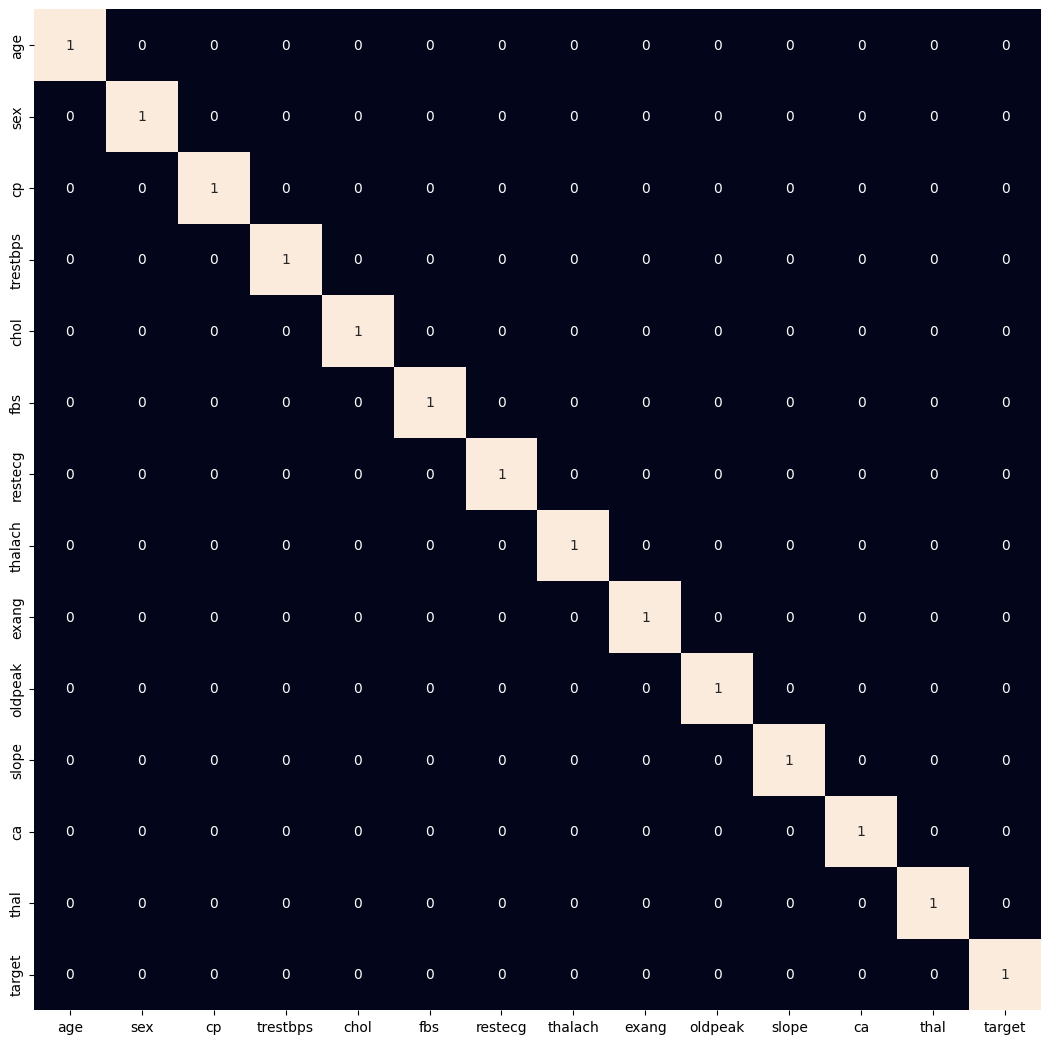

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
sb.heatmap(heart_data.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

1-->Defective heart

0-->Healthy heart





SPLITTING THE FEATURES AND TARGET


In [18]:
#features in X and target in Y for further evaluation
X=heart_data.drop(columns='target',axis=1) #for dropping coloumn keep axis as 1 or for dropping a row then 0
Y=heart_data['target']

In [30]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [29]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the data into training and test data

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [78]:
print(X.shape,X_train.shape,X_test.shape)


(303, 13) (242, 13) (61, 13)


MODEL TRAINING

In [ ]:
# model=LogisticRegression()

In [22]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:

from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    LogisticRegression(),
    XGBClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
     KNeighborsClassifier()
]
#since dataset is balanced we use accuracy score for comparision
for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training accuracy : ', accuracy_score(train_preds,Y_train))

    test_preds = models[i].predict(X_test)
    print('test accuracy : ', accuracy_score(test_preds,Y_test))
    print()



LogisticRegression() : 
Training accuracy :  0.8471074380165289
test accuracy :  0.7868852459016393

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training accuracy :  1.0
test accuracy :  0.7540983606557377

DecisionTreeClassifier() : 
Training accuracy :  1.0
test accuracy :  0.7868

In [84]:
#training the logistic regression model with training data
# model.fit(X_train.values,Y_train.values) #try to find relationship between features and target

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),       # Scale the data
    ('logreg', LogisticRegression(max_iter=100))
])
model.fit(X_train, Y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

MODEL EVALUATION

ACCURACY SCORE

In [87]:
#accuracy on training data
X_train_prediction=model.predict(X_train) #prediction based on trained model returns a list
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [88]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8471074380165289


In [89]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('test data accuracy:',test_data_accuracy)

test data accuracy: 0.7868852459016393


CONFUSION MATRIX

Accuracy: 0.79
Precision: 0.81
Recall: 0.79
F1 Score: 0.80


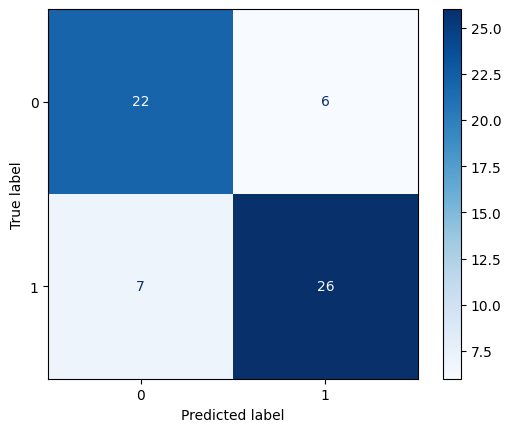

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score
#Compute the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
# Step 5: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

accuracy = accuracy_score(Y_test, X_test_prediction)
preci = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {preci:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

BUILDING A PREDICTIVE SYSTEM

In [91]:
input_data=(57,0,0,140,241,0,1,123,1,0.2,1,0,3)
feature_names = X_train.columns

# Create a DataFrame for input_data with the same feature names
input_data_df = pd.DataFrame([input_data], columns=feature_names)


# #change the data to a numpy array (to make it usable for prediction)
# input_data_as_numpy_array=np.asarray(input_data)

# #reshape the numpy array as we are predicting for only one instance
# input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
# prediction=model.predict(input_data_reshaped)


prediction=model.predict(input_data_df)
print(prediction)

if(prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')


[0]
The person does not have a heart disease
